<a href="https://colab.research.google.com/github/cathyai0320/A.I./blob/main/Team_TL%3BDR_(Catherine)_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Diagnosing pancreatic cancer using Logistic Regression model`**

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

**Understanding the nature of the data:**


In [71]:
file_path = '/content/Debernardi et al 2020 data.csv'
data = pd.read_csv(file_path)

In [ ]:
print(data.describe())

In [ ]:
print(data.dtypes)

In [89]:
print(data.head())

  sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0        S1        Cohort1          BPTB   33   F          1   NaN   
1       S10        Cohort1          BPTB   81   F          1   NaN   
2      S100        Cohort2          BPTB   51   M          1   NaN   
3      S101        Cohort2          BPTB   61   M          1   NaN   
4      S102        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.95000

**Data Pre-processing:**

In [ ]:
# Check if there are any missing values in the dataset
print(data.isnull().sum())

In [ ]:
# Drop the columns with missing values
data_dropped = data.drop(['stage', 'benign_sample_diagnosis', 'REG1A'], axis=1)
print(data_dropped)
print(data)

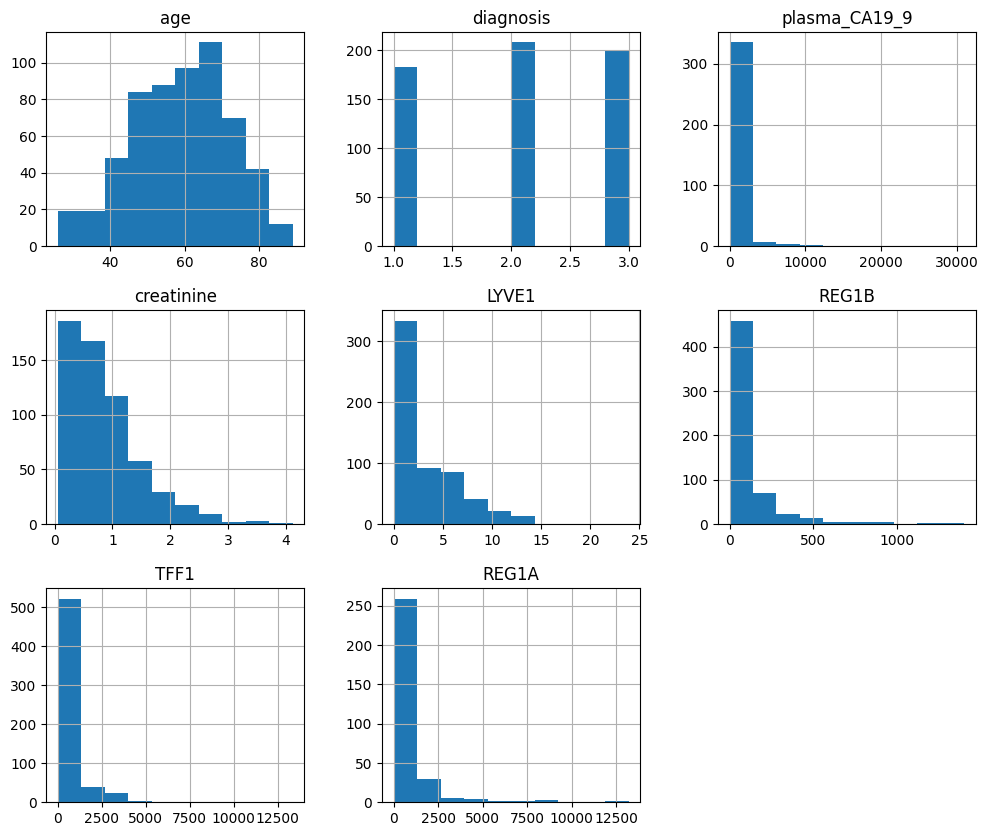

In [85]:
data.hist(figsize=(12, 10))
plt.show()

In [ ]:
# Filter the data for pancreatic cancer cases
pancreatic_cancer_data = data[data['diagnosis'] == 1]

# List of columns to plot
columns_to_plot = ['age','plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Plot histograms for each column
for column in columns_to_plot:
    plt.hist(pancreatic_cancer_data[column], bins=10, alpha=0.5, label='Pancreatic Cancer')
    plt.hist(data[column], bins=10, alpha=0.5, label='All Cases')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.title(f'Distribution of {column} for Pancreatic Cancer Cases')
    plt.show()

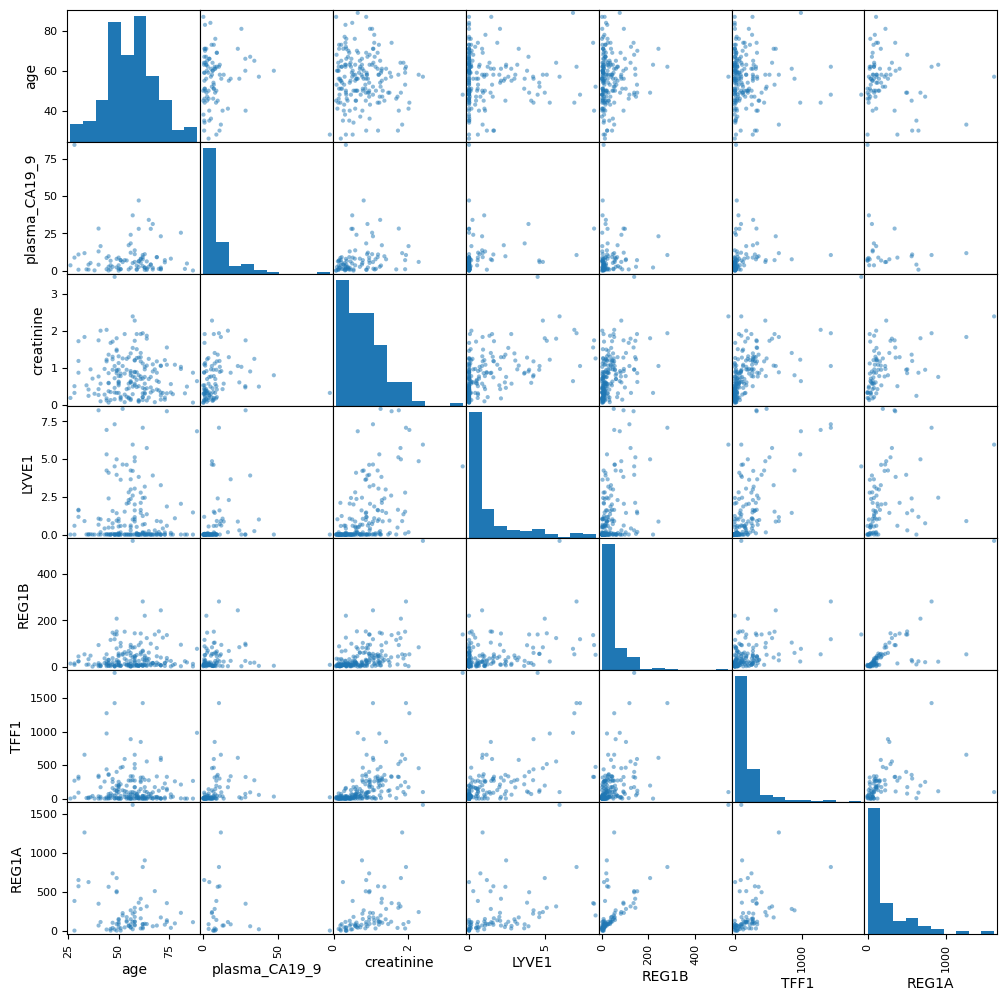

In [90]:
# Select relevant columns for analysis
columns_to_plot = ['age', 'sex', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Create a scatter matrix plot
pd.plotting.scatter_matrix(pancreatic_cancer_data[columns_to_plot], figsize=(12, 12), diagonal='hist')
plt.show()

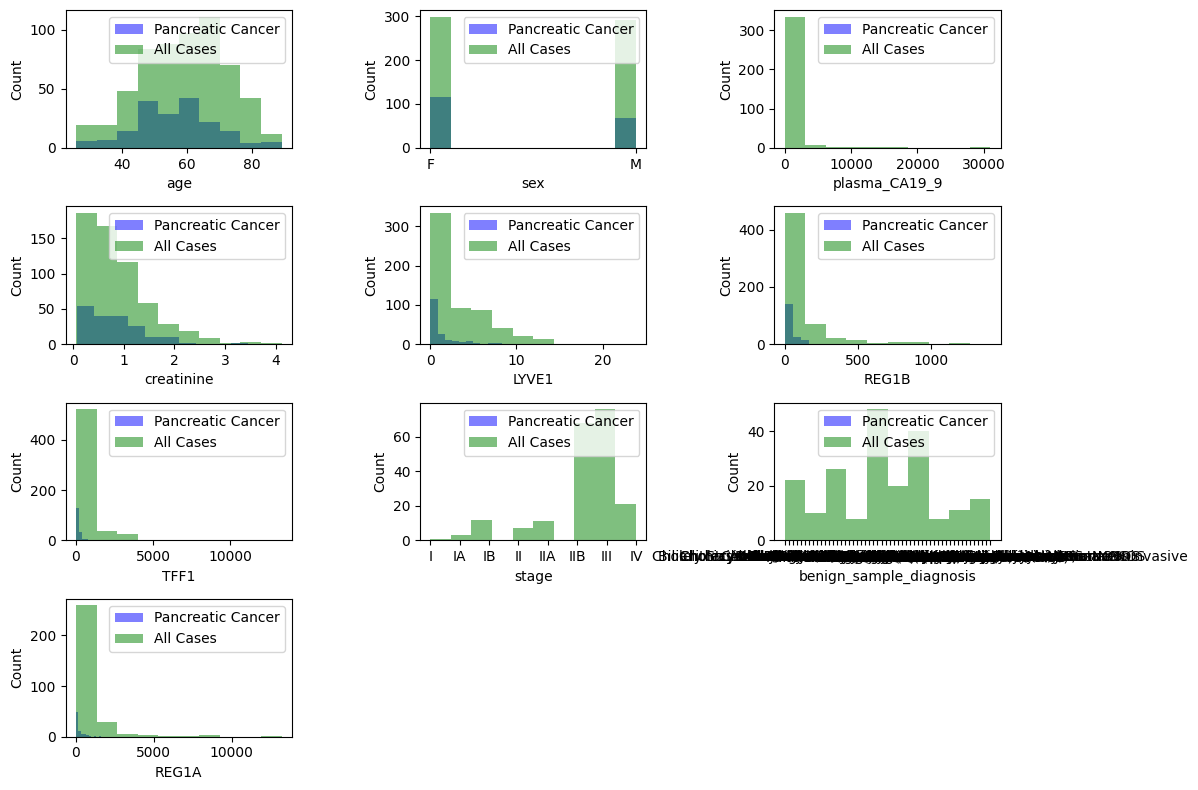

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for pancreatic cancer cases
pancreatic_cancer_data = data[data['diagnosis'] == 1]

# Select relevant columns for analysis
columns_to_plot = ['age', 'sex', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'stage', 'benign_sample_diagnosis', 'REG1A']

# Calculate the number of rows and columns for the subplot grid
num_columns = 3
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    # Exclude NaN values for each dataset
    pancreatic_cancer_values = pancreatic_cancer_data[column].dropna()
    all_values = data[column].dropna()

    axes[i].hist(pancreatic_cancer_values, bins=10, alpha=0.5, label='Pancreatic Cancer', color='blue')
    axes[i].hist(all_values, bins=10, alpha=0.5, label='All Cases', color='green')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend()

# Remove any unused subplots
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()



<ipython-input-102-e2837d1537a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['diagnosis'] = 'Pancreatic Cancer'
<ipython-input-102-e2837d1537a8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_selected_data['diagnosis'] = 'All Cases'


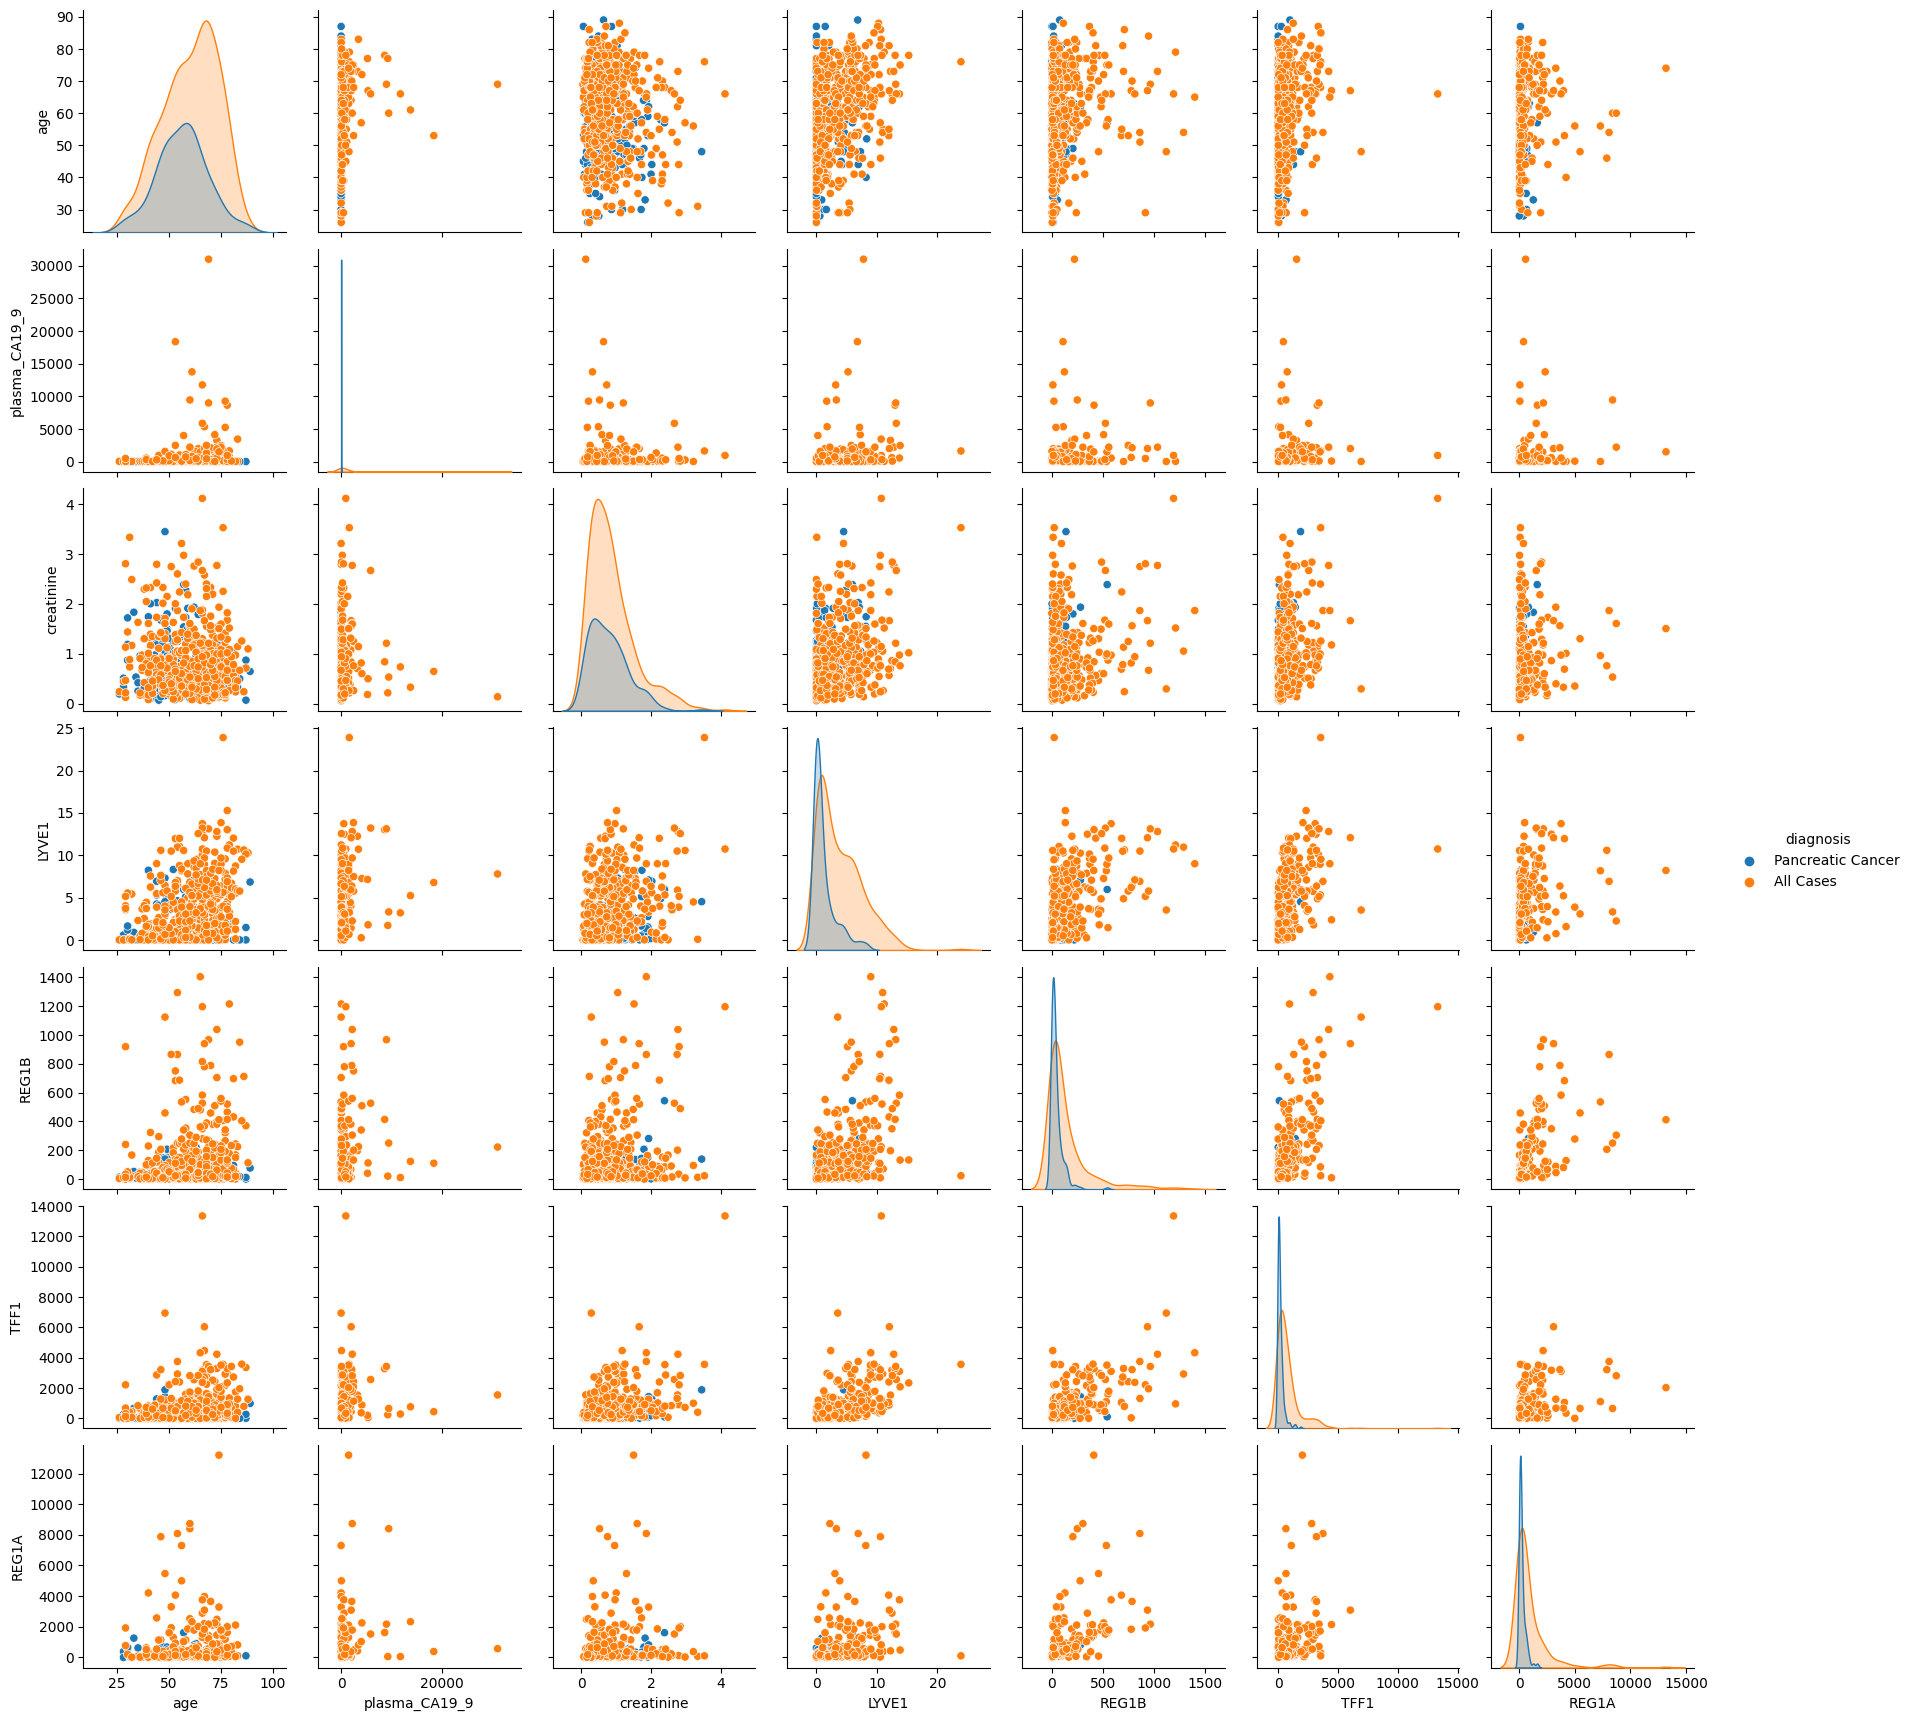

In [102]:
# Filter the data for pancreatic cancer cases
pancreatic_cancer_data = data[data['diagnosis'] == 1]

# Select relevant columns for analysis
columns_to_plot = ['age', 'sex', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Create a dataframe with selected columns
selected_data = pancreatic_cancer_data[columns_to_plot]

# Add a target column to identify pancreatic cancer cases
selected_data['diagnosis'] = 'Pancreatic Cancer'

# Append all cases to the selected data
all_cases = data[data['diagnosis'] != 1]
all_selected_data = all_cases[columns_to_plot]
all_selected_data['diagnosis'] = 'All Cases'

# Concatenate pancreatic cancer and all cases data
combined_data = pd.concat([selected_data, all_selected_data])

# Create a scatter plot matrix
sns.pairplot(combined_data, hue='diagnosis')
plt.show()

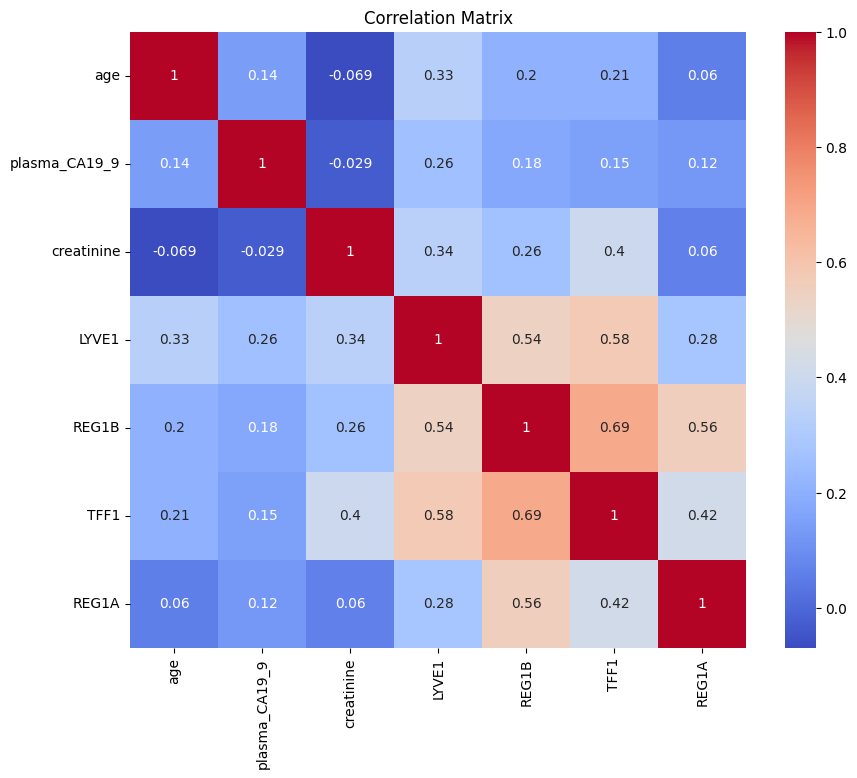

In [101]:
#Got this idea from youtube
# Select numerical columns for correlation analysis
numerical_columns = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [103]:
#Check the unique values in each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'sample_id': ['S1' 'S10' 'S100' 'S101' 'S102' 'S103' 'S104' 'S105' 'S106' 'S107' 'S108'
 'S109' 'S11' 'S110' 'S111' 'S112' 'S113' 'S114' 'S115' 'S116' 'S117'
 'S118' 'S119' 'S12' 'S120' 'S121' 'S122' 'S123' 'S124' 'S125' 'S126'
 'S127' 'S128' 'S129' 'S13' 'S130' 'S131' 'S132' 'S133' 'S134' 'S135'
 'S136' 'S137' 'S138' 'S139' 'S14' 'S140' 'S141' 'S142' 'S143' 'S144'
 'S145' 'S146' 'S147' 'S148' 'S149' 'S15' 'S150' 'S151' 'S152' 'S153'
 'S154' 'S155' 'S156' 'S157' 'S158' 'S159' 'S16' 'S160' 'S161' 'S162'
 'S163' 'S164' 'S165' 'S166' 'S167' 'S168' 'S169' 'S17' 'S170' 'S171'
 'S172' 'S173' 'S174' 'S175' 'S176' 'S177' 'S178' 'S179' 'S18' 'S180'
 'S181' 'S182' 'S183' 'S19' 'S2' 'S20' 'S21' 'S22' 'S23' 'S24' 'S25' 'S26'
 'S27' 'S28' 'S29' 'S3' 'S30' 'S31' 'S32' 'S33' 'S34' 'S35' 'S36' 'S37'
 'S38' 'S39' 'S4' 'S40' 'S41' 'S42' 'S43' 'S44' 'S45' 'S46' 'S47' 'S48'
 'S49' 'S5' 'S50' 'S51' 'S52' 'S53' 'S54' 'S55' 'S56' 'S57' 'S58' 'S59'
 'S6' 'S60' 'S61' 'S62' 'S63' 'S64' '

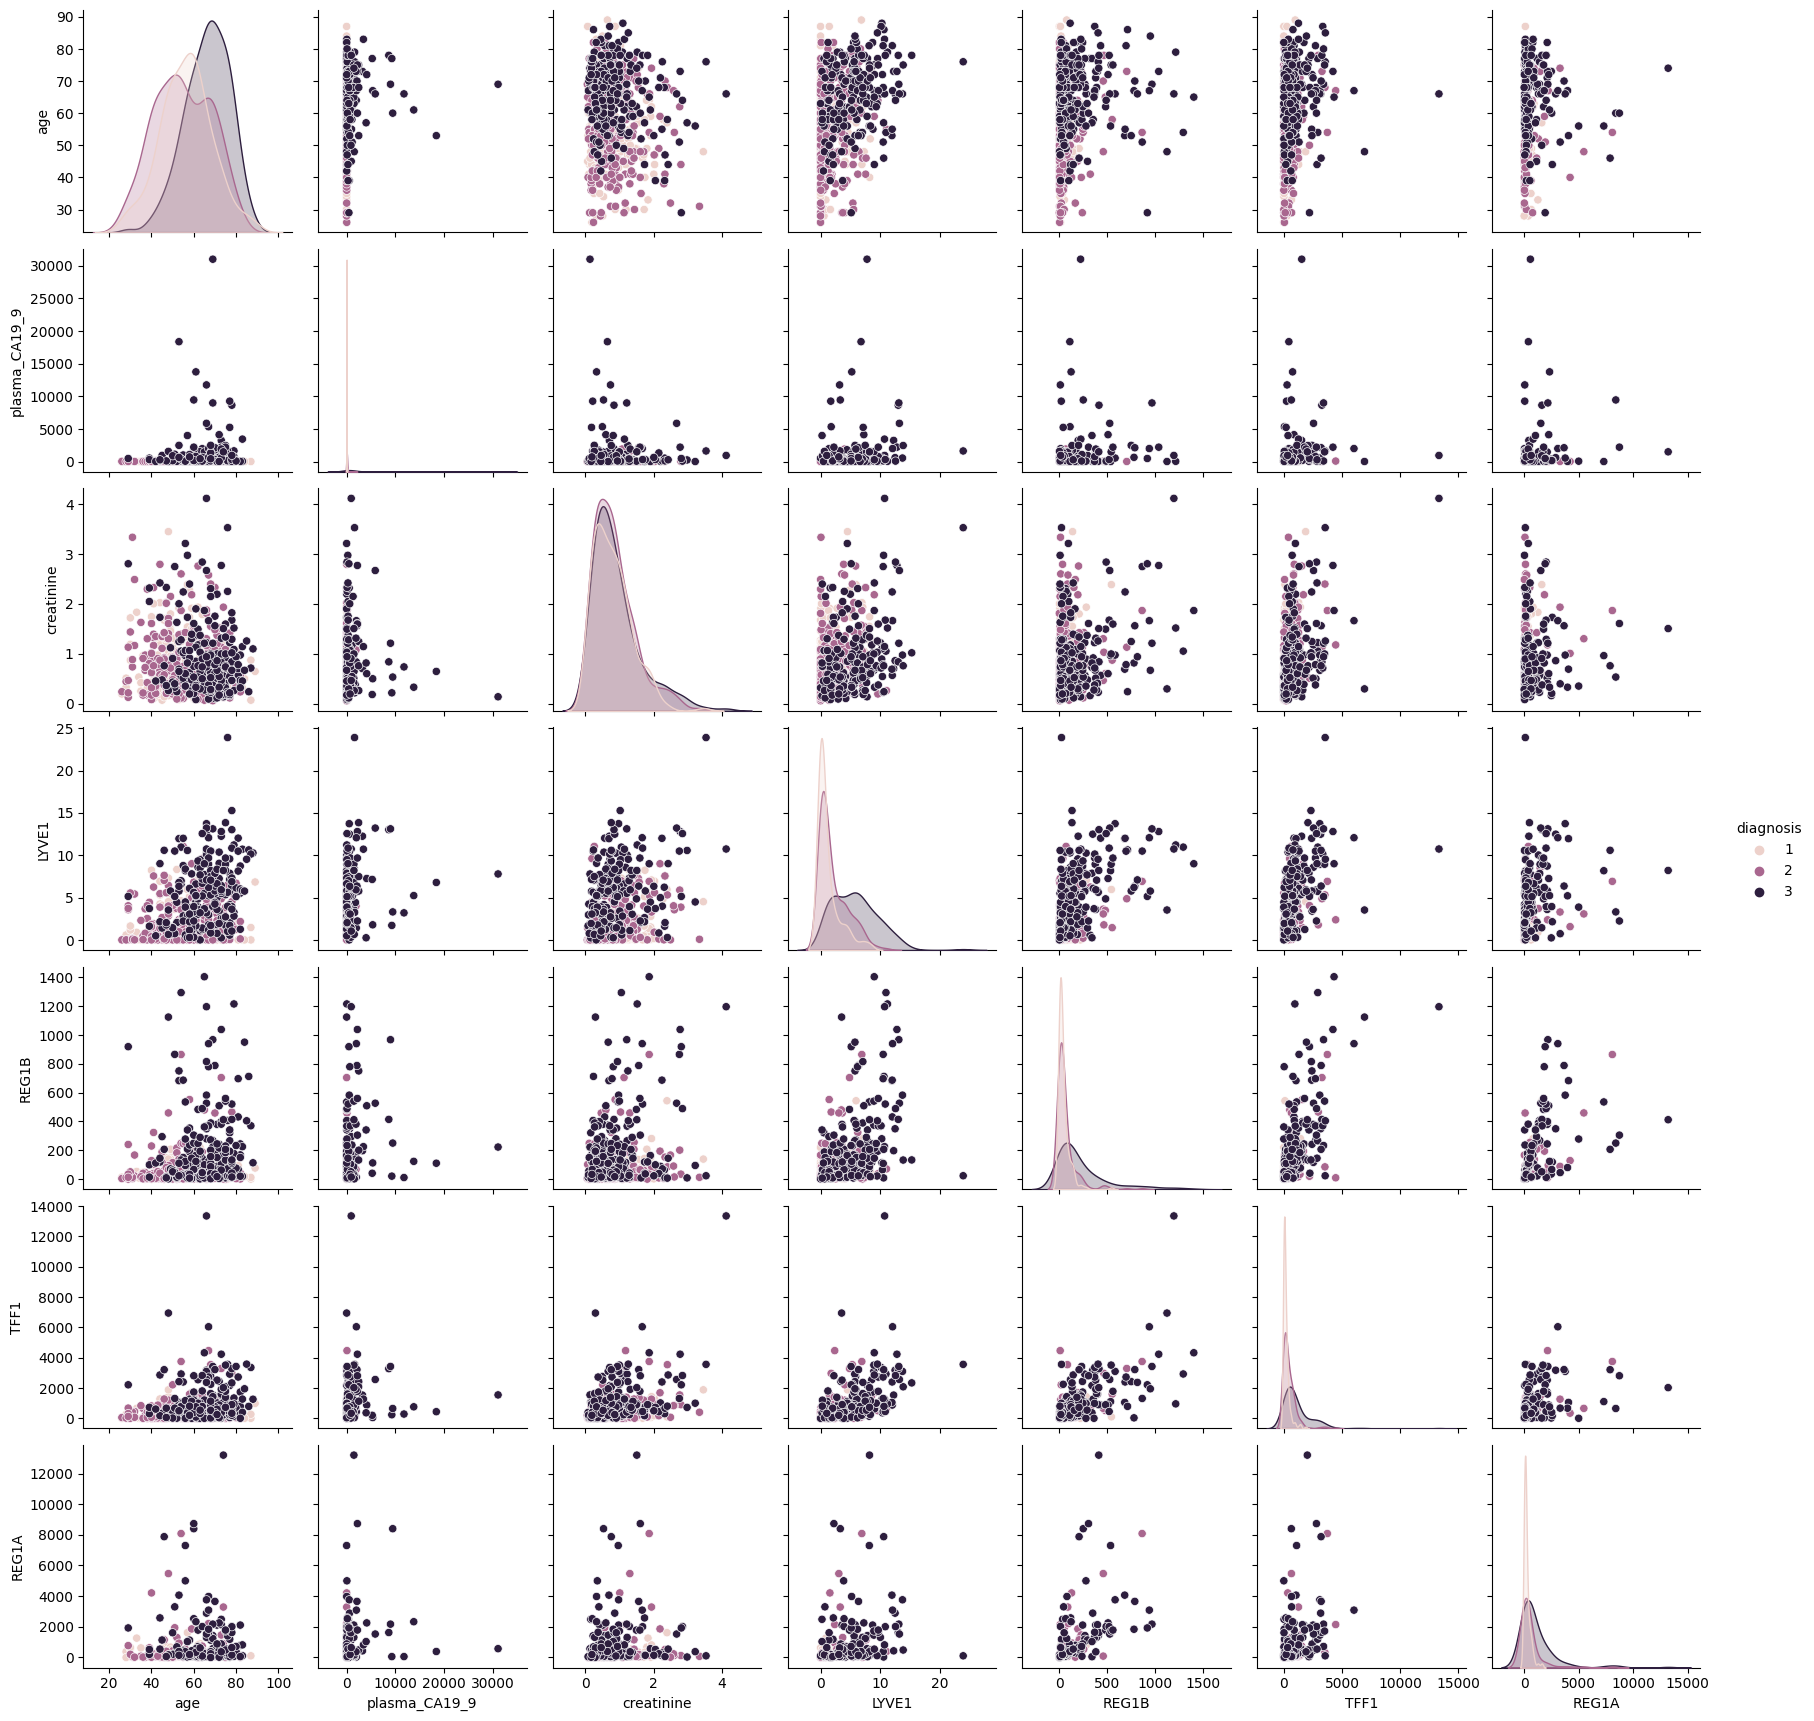

In [104]:
# Visualize the data using plots and charts
# Example: Pairplot to visualize relationships between variables
sns.pairplot(data, hue='diagnosis')
plt.show()

**Splitting the data, selecting and training the model:**

In [105]:
# Split data into features (X) and target (y)
X = data[['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']]
y = data['diagnosis']

In [63]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Create a scaler and fit on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create and train the Logistic Regression model with scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [67]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]

In [107]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.6486486486486487
Precision: 0.4207450693937181
Recall: 0.6486486486486487
F1-Score: 0.5104120513956579


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
